In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_unfiltered = pd.read_csv('../../data/processed/credit_risk_dataset_processed.csv')

df = df_unfiltered[df_unfiltered['person_age'] < 100]
# print(df.head())

print(df.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  28495.000000   2.849500e+04       28495.000000  28495.000000   
mean      27.723530   6.643047e+04           4.781751   9657.366205   
std        6.177199   5.151374e+04           4.037958   6327.711290   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.948000e+04           2.000000   5000.000000   
50%       26.000000   5.600000e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max       84.000000   2.039784e+06          41.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28495.000000  28495.000000         28495.000000   
mean       11.045220      0.217126             0.169517   
std         3.230786      0.412296             0.106379   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [2]:
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'person_credit_history']

categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade']



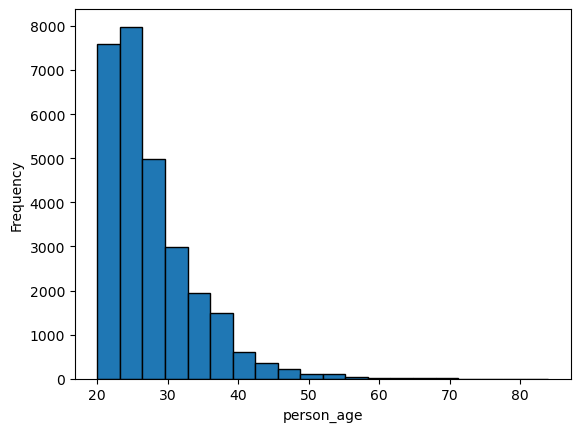

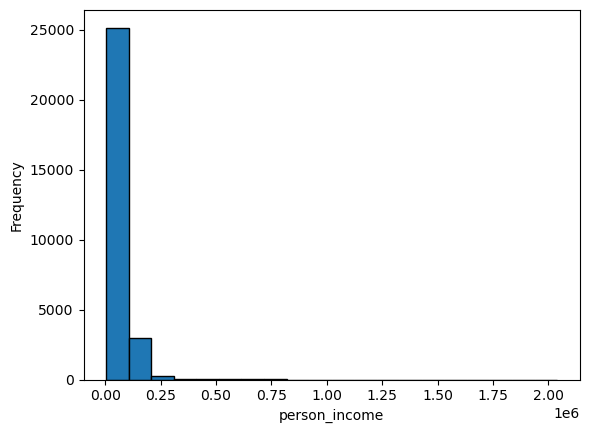

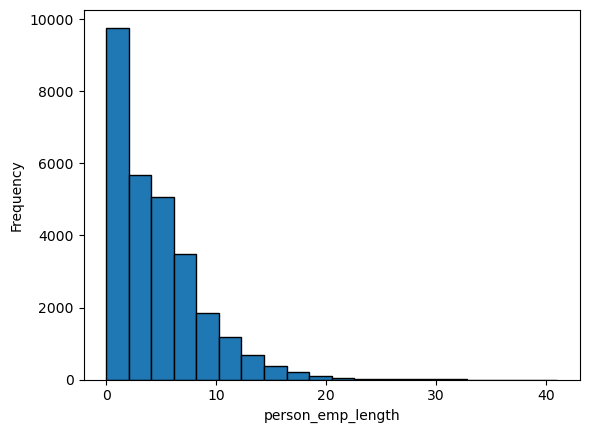

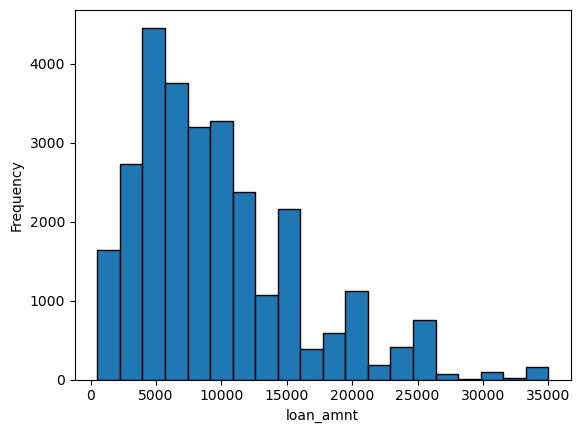

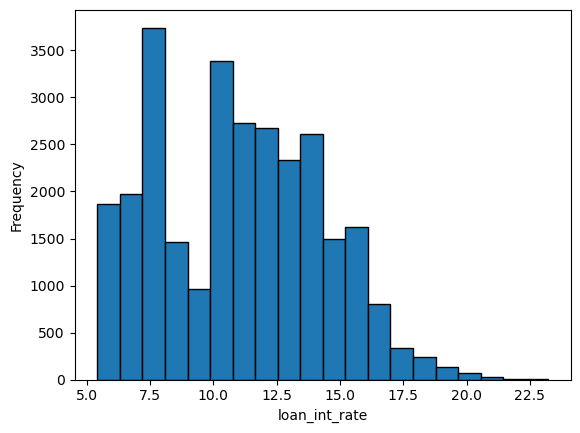

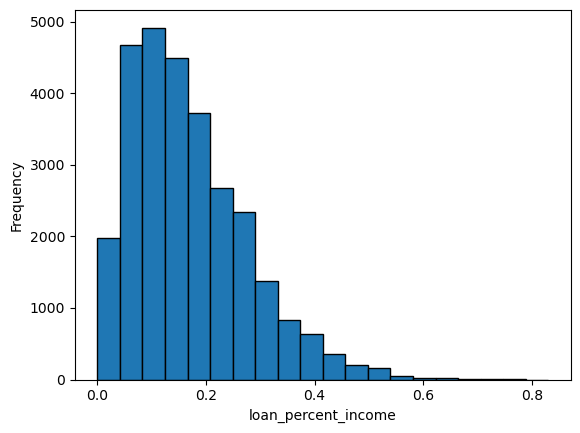

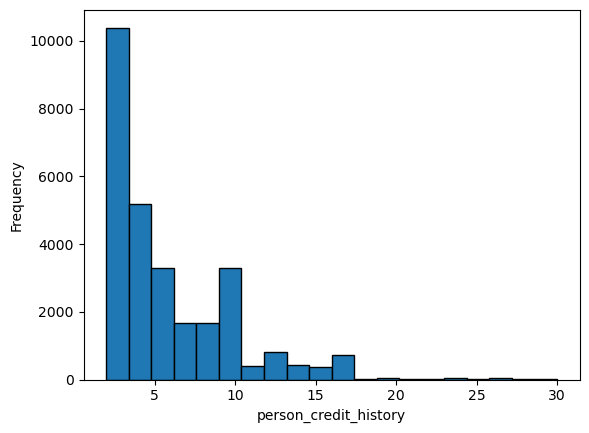

In [3]:
for feature in numeric_features:
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

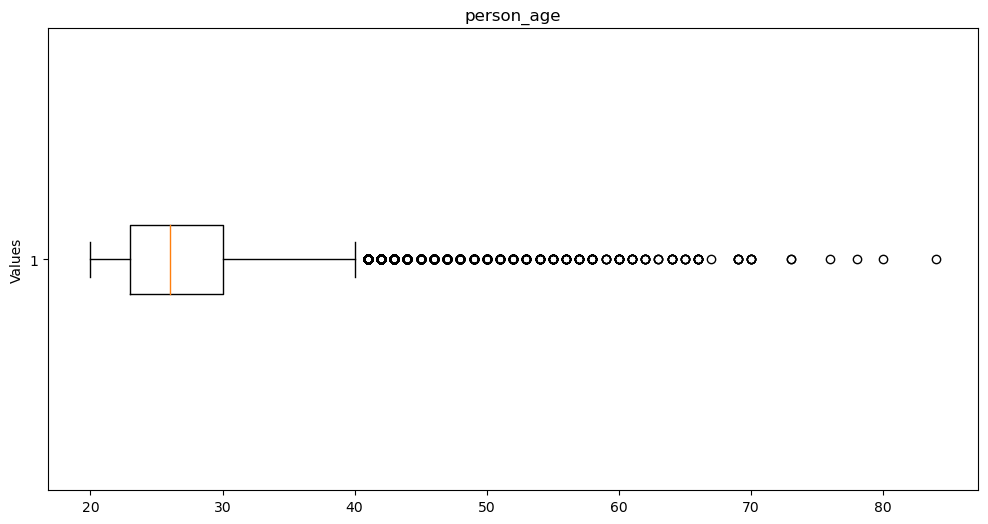

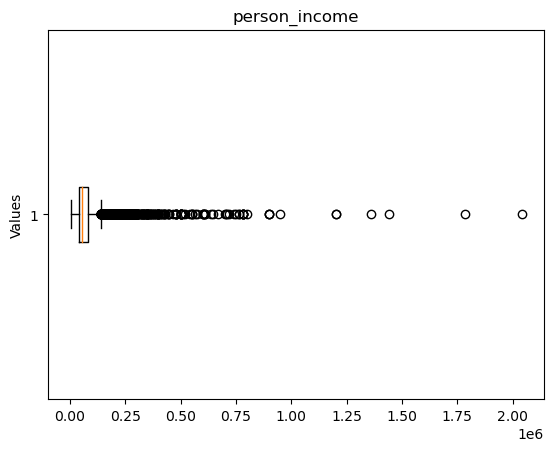

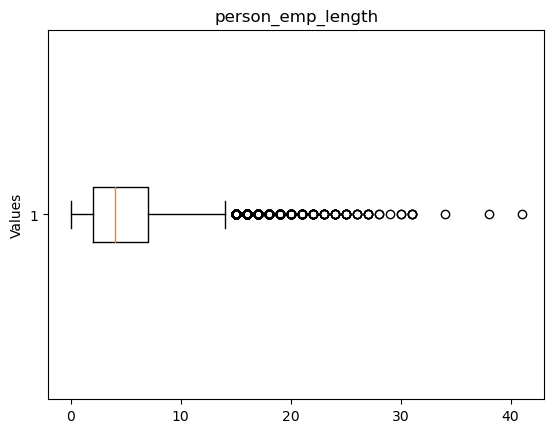

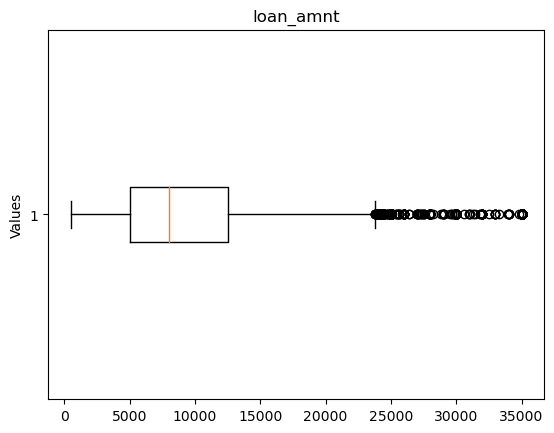

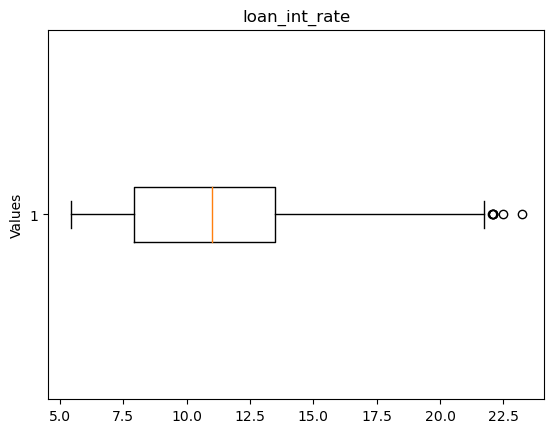

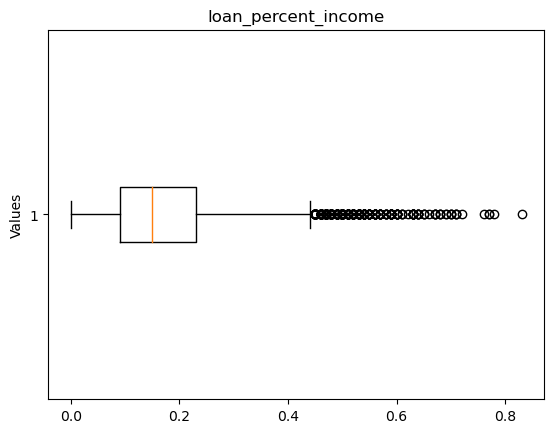

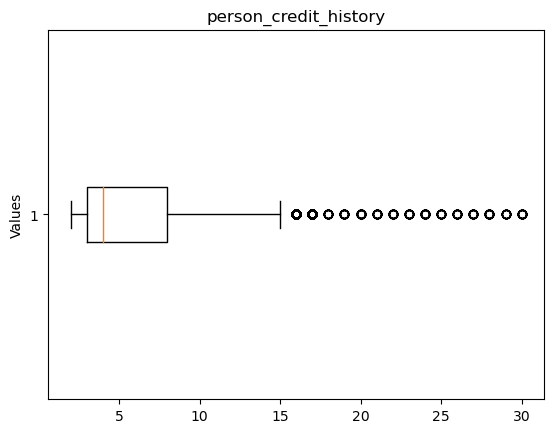

In [4]:
plt.figure(figsize=(12, 6))

for feature in numeric_features:
    plt.boxplot(df[feature],vert=False)
    plt.title(feature)
    plt.ylabel('Values')
    plt.show()

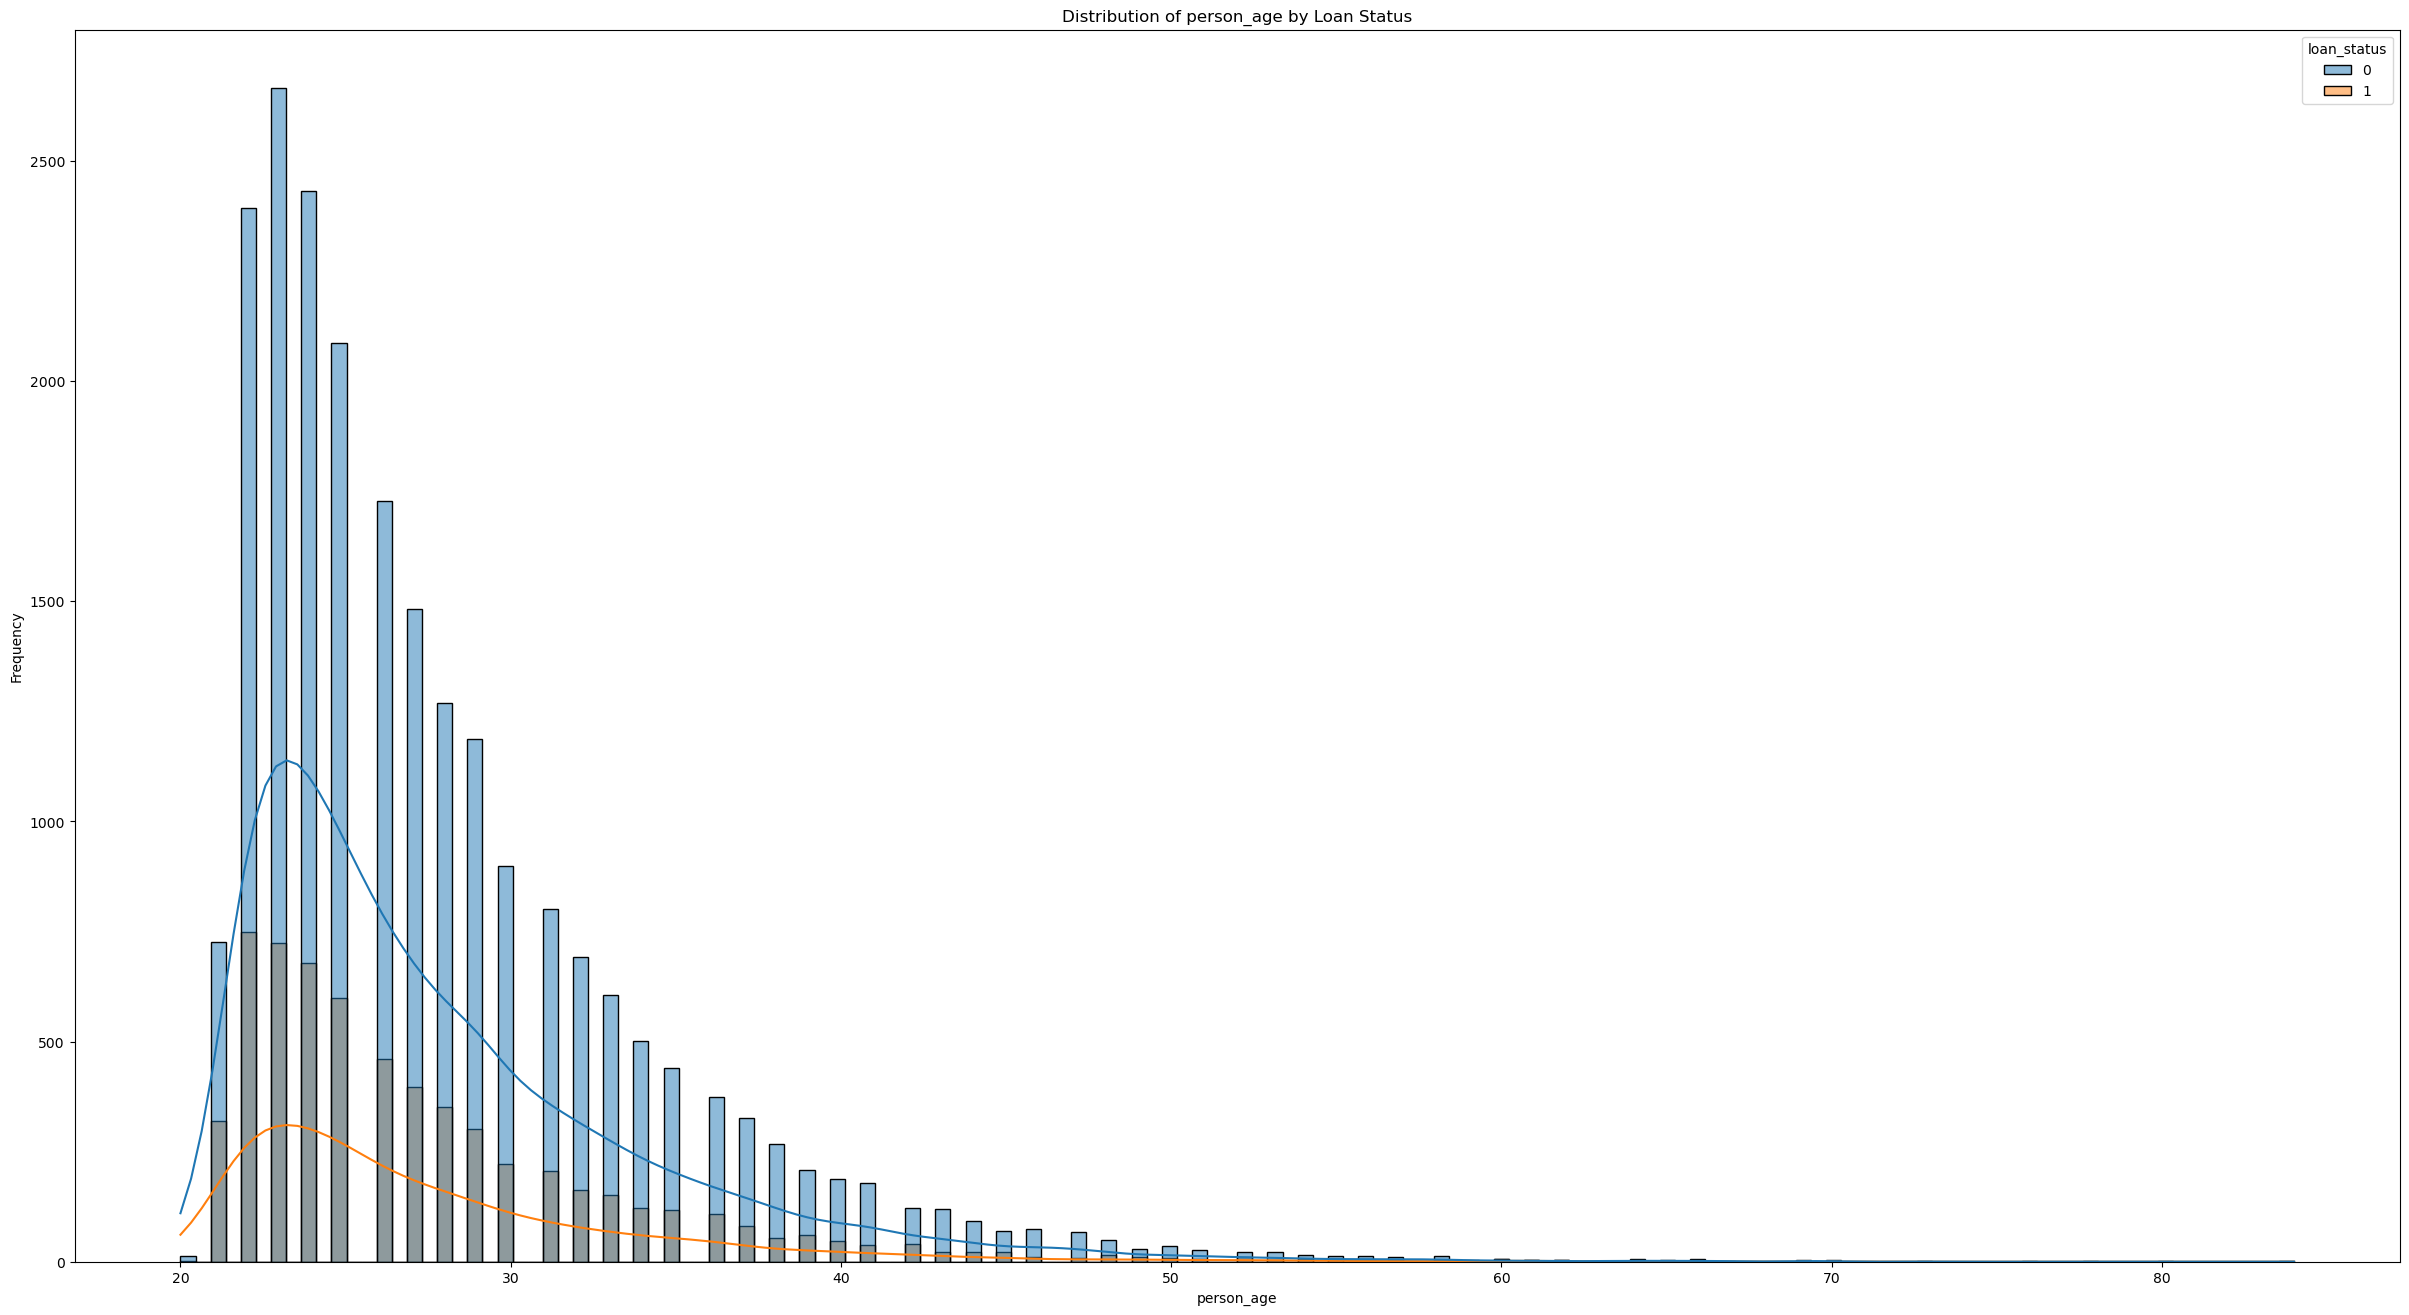

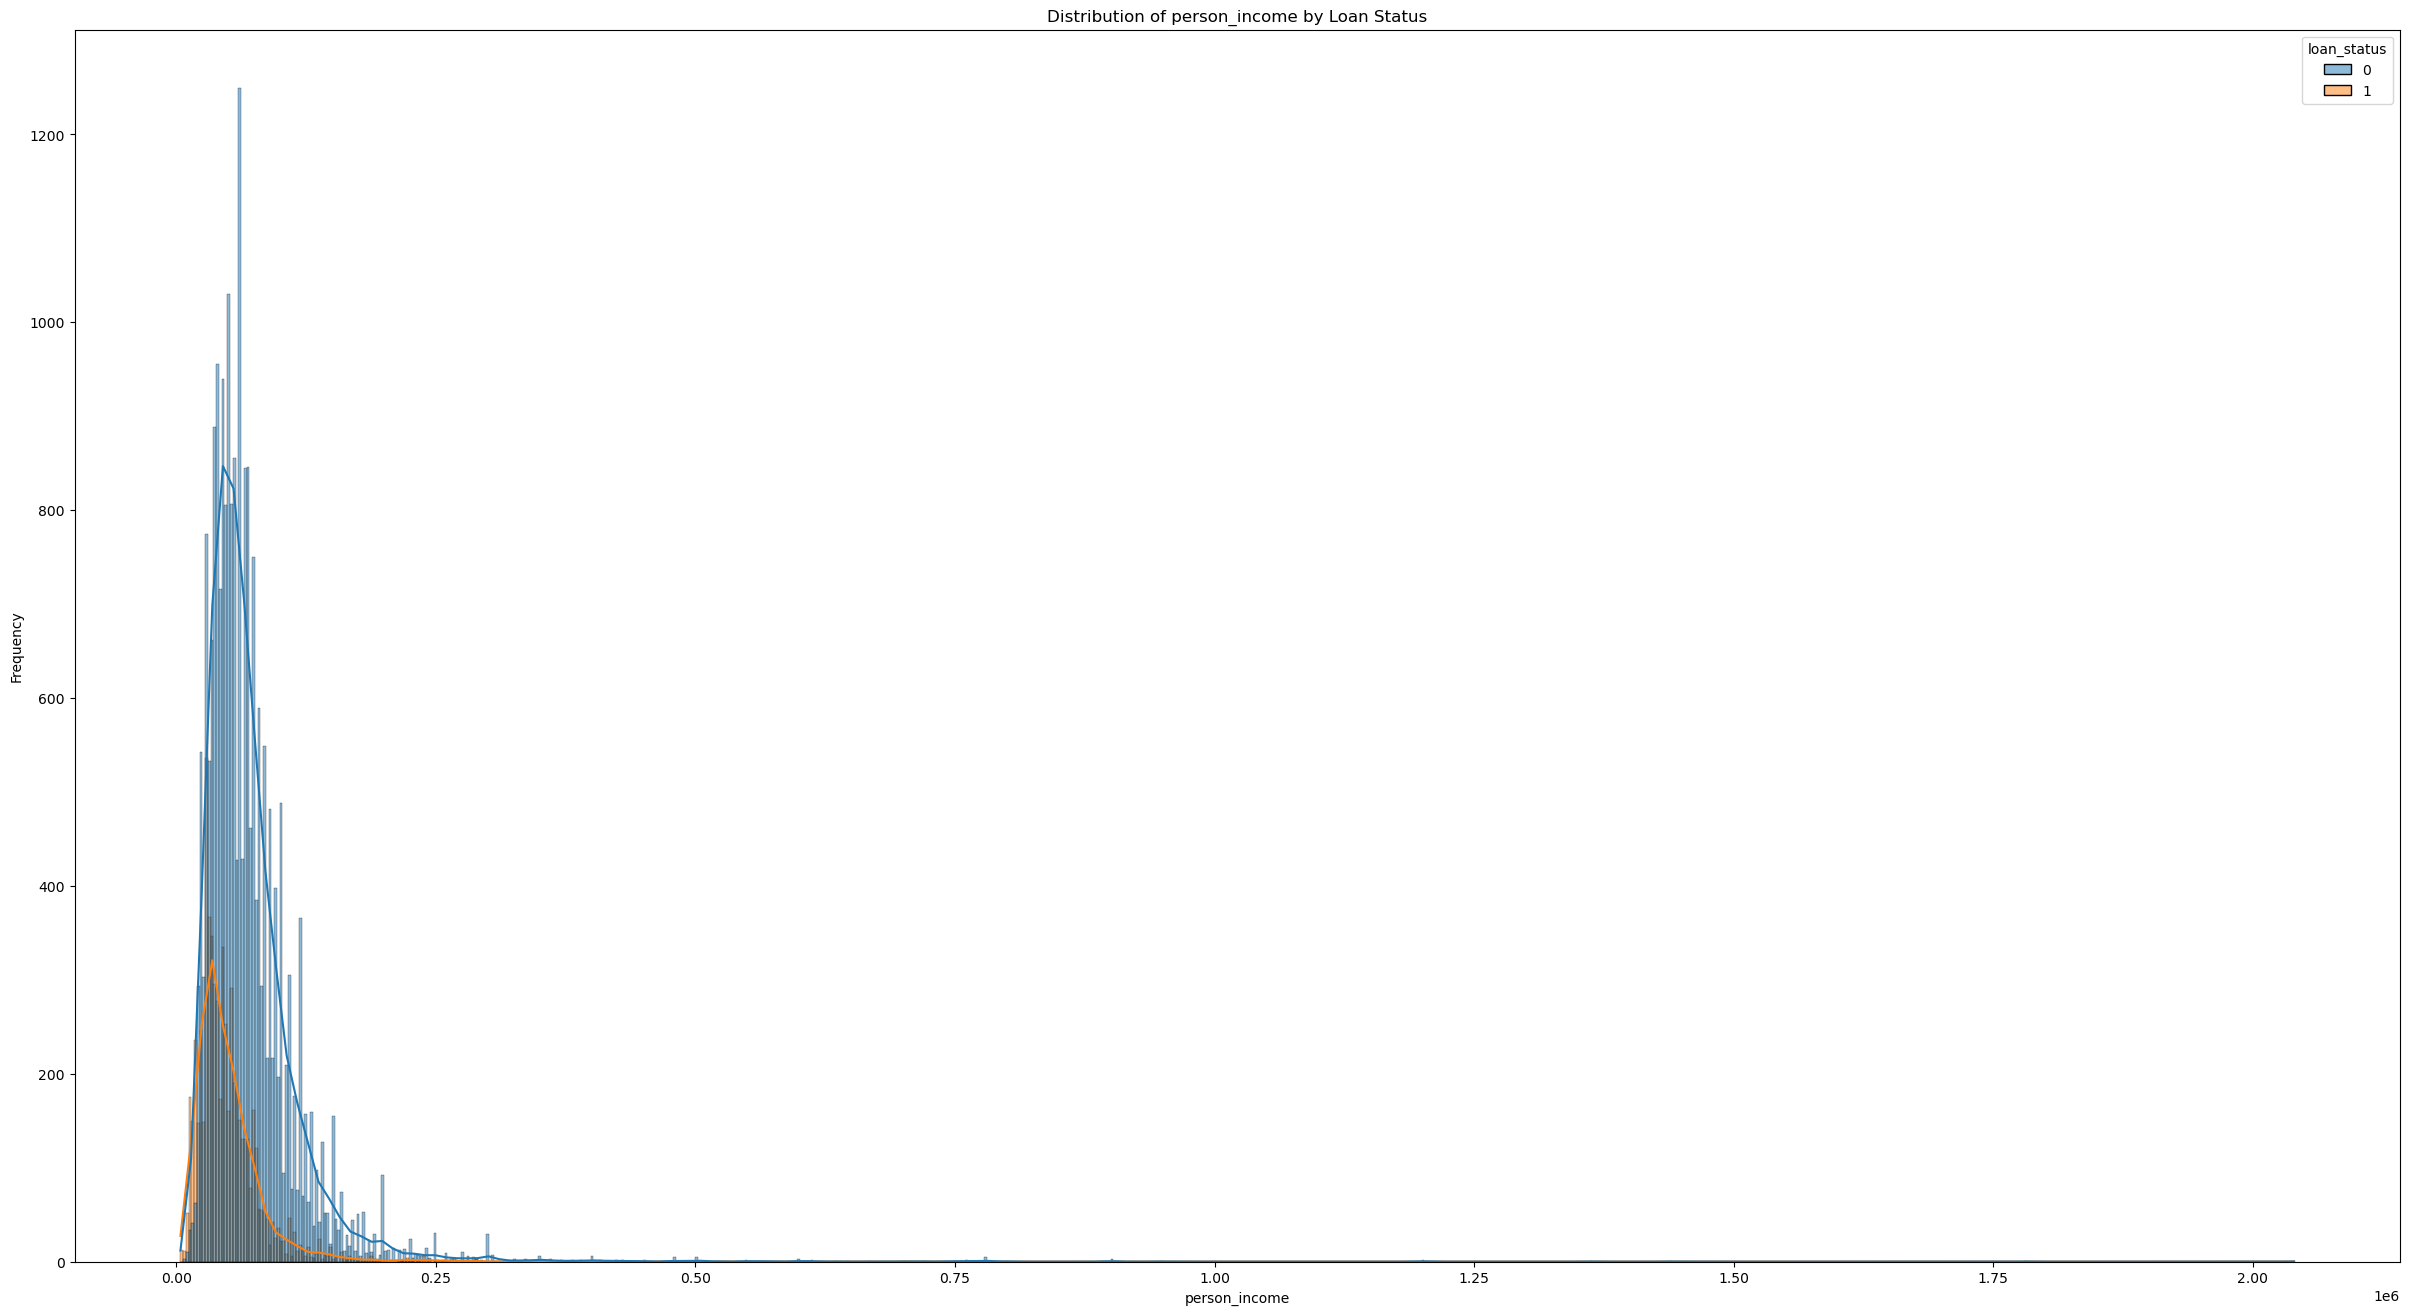

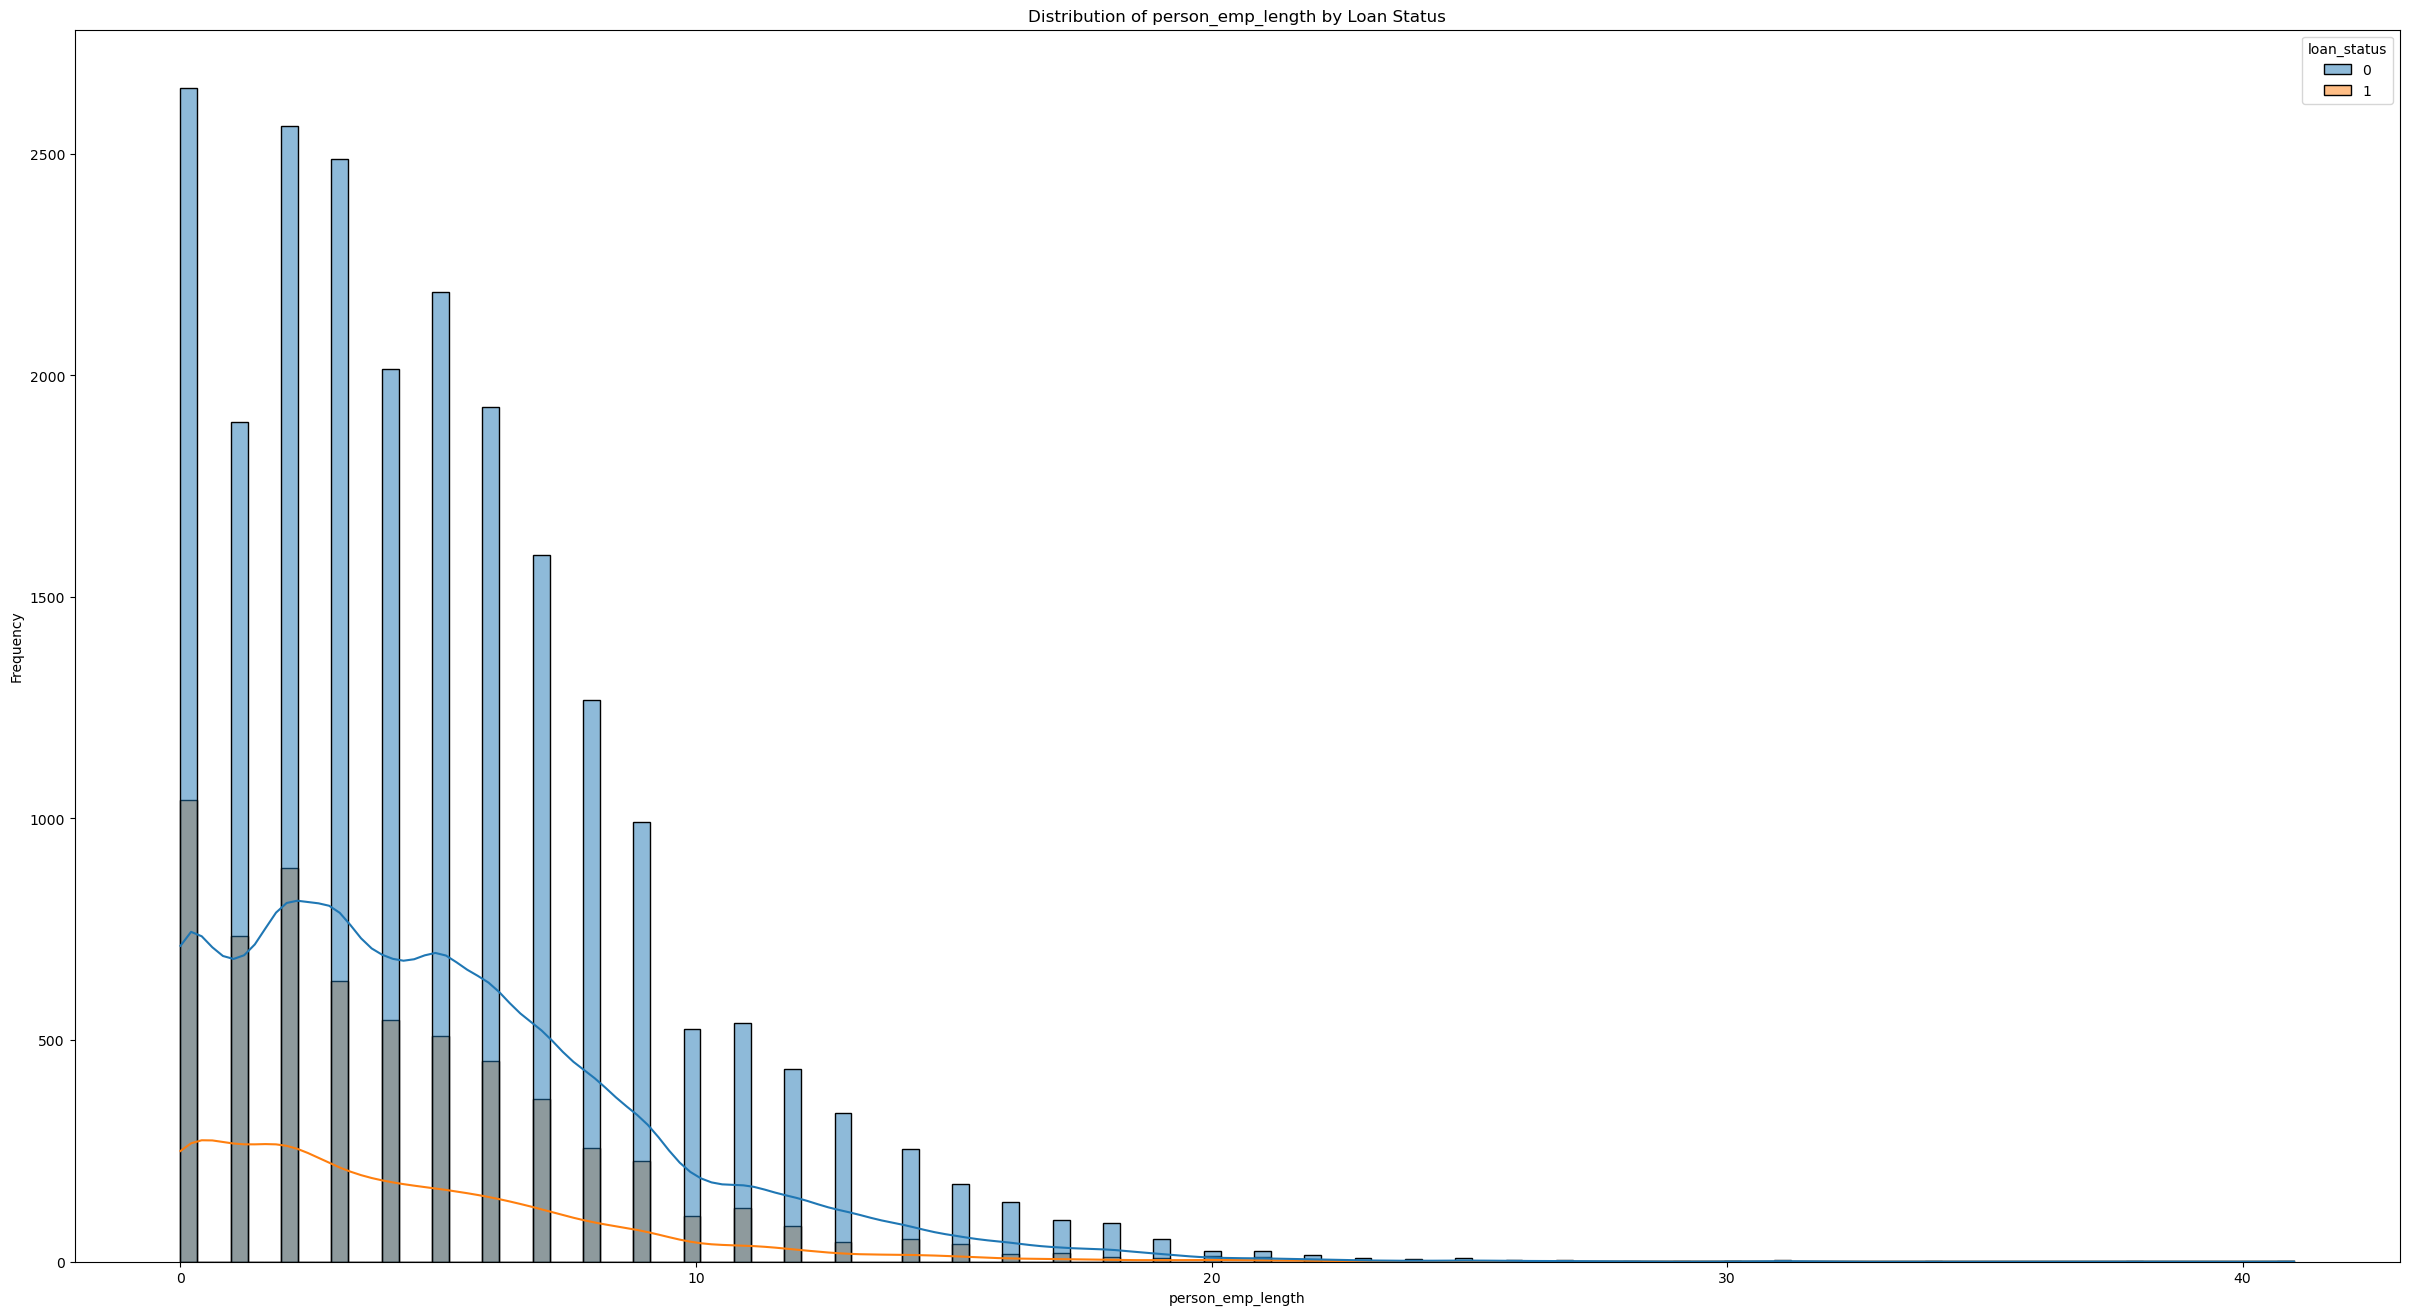

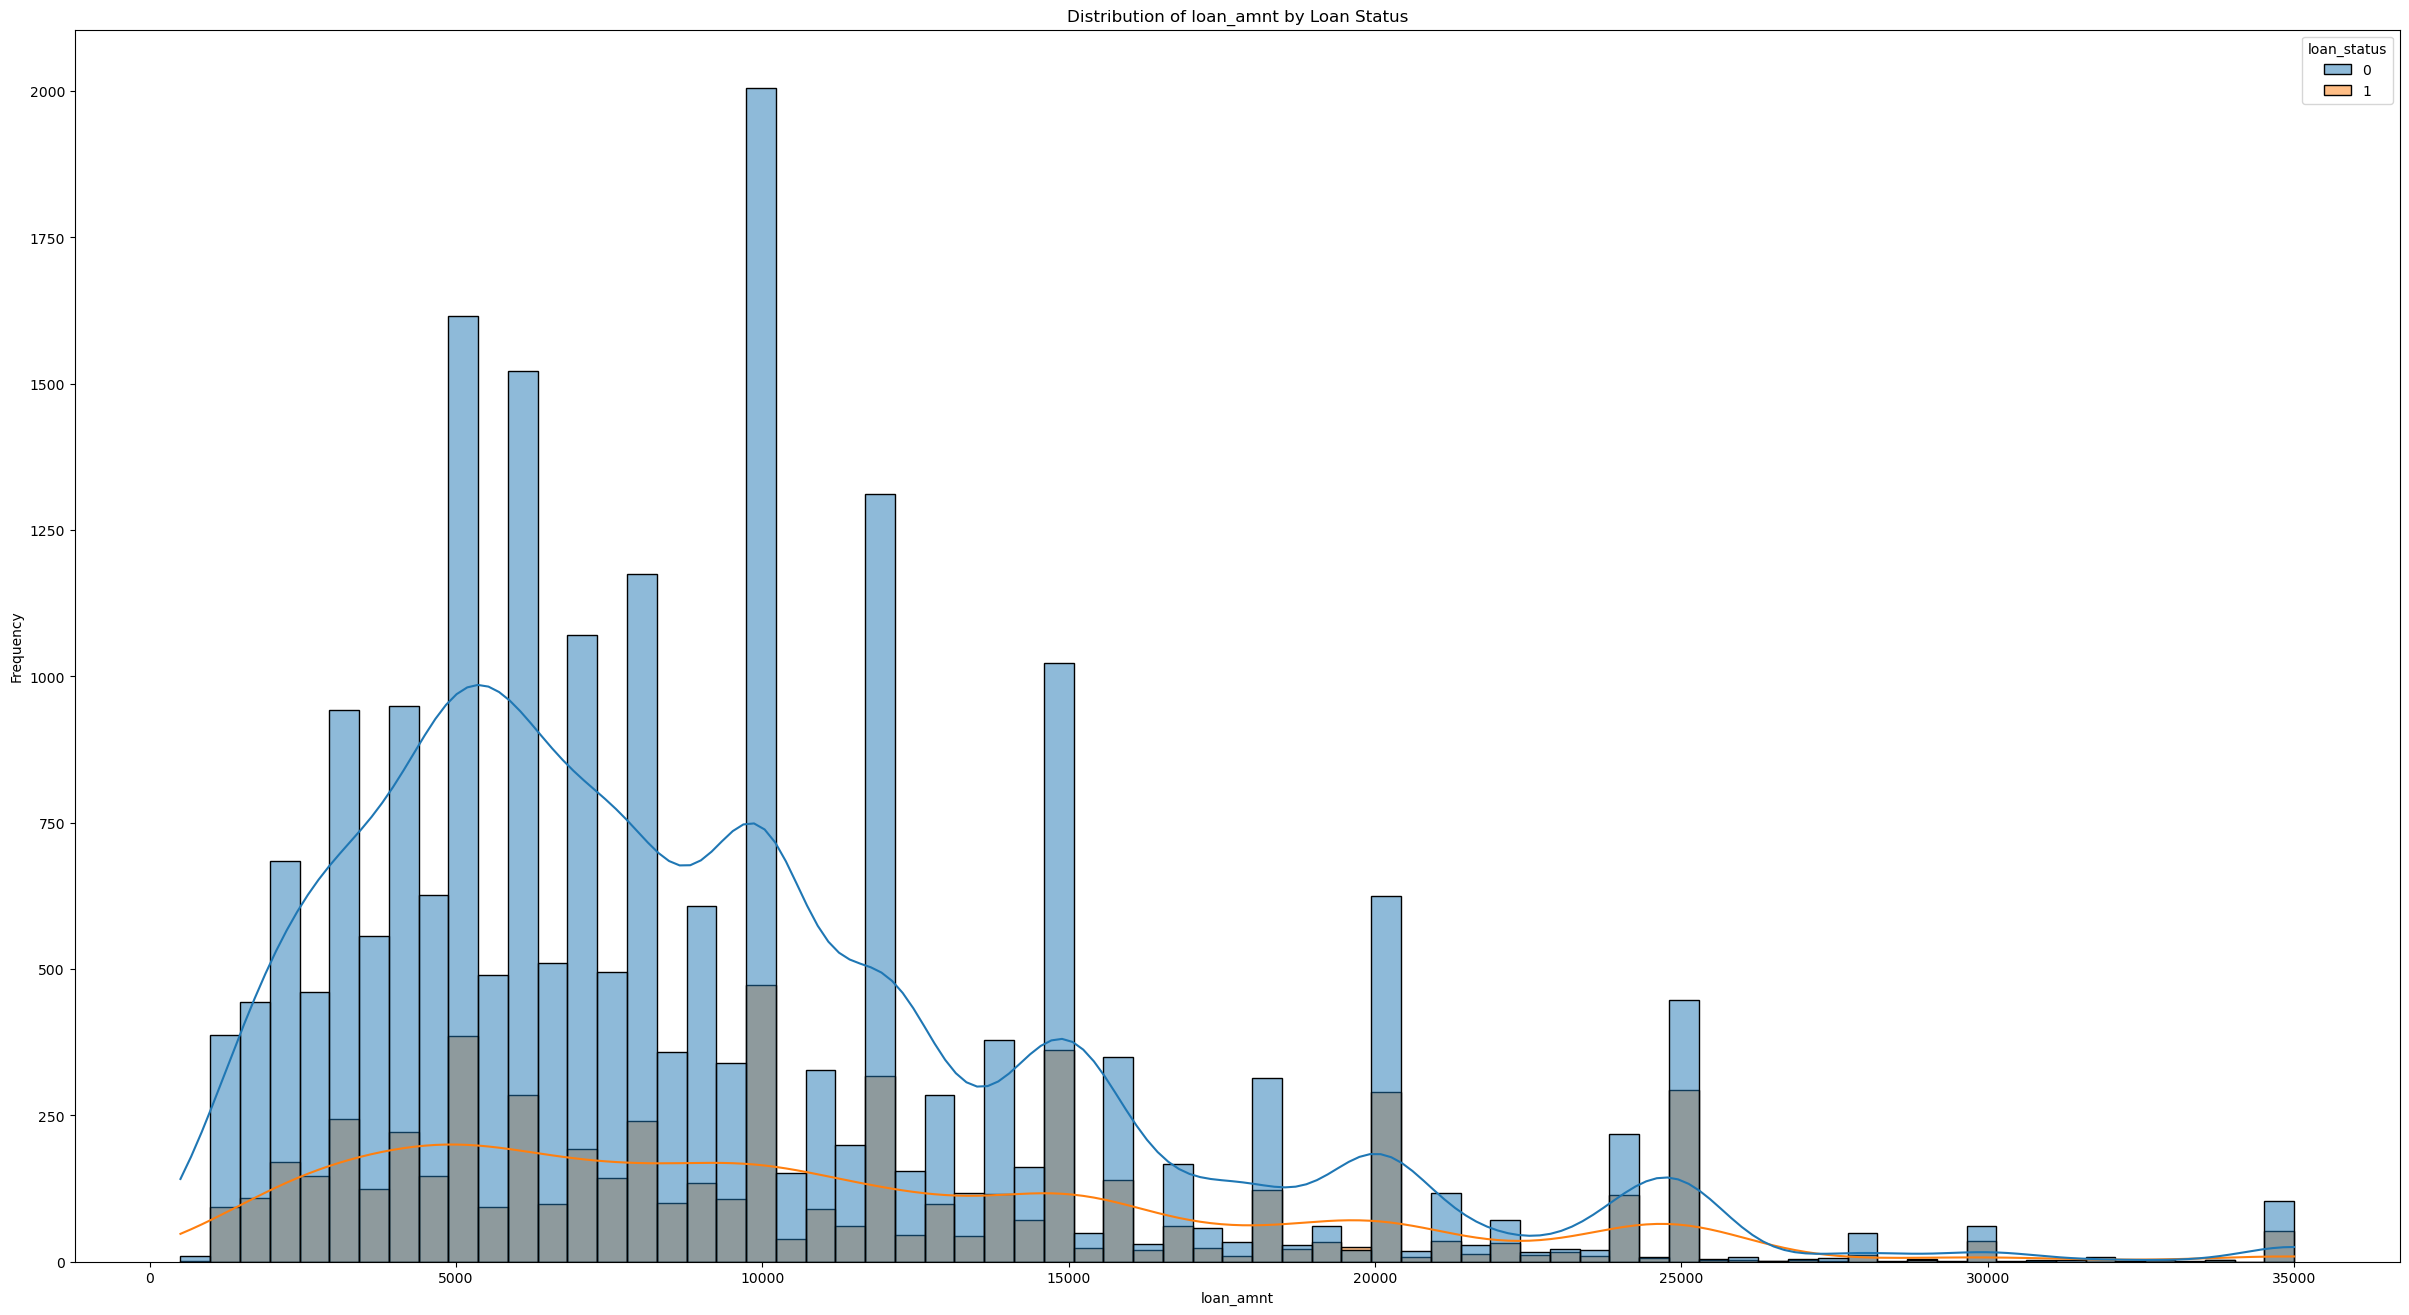

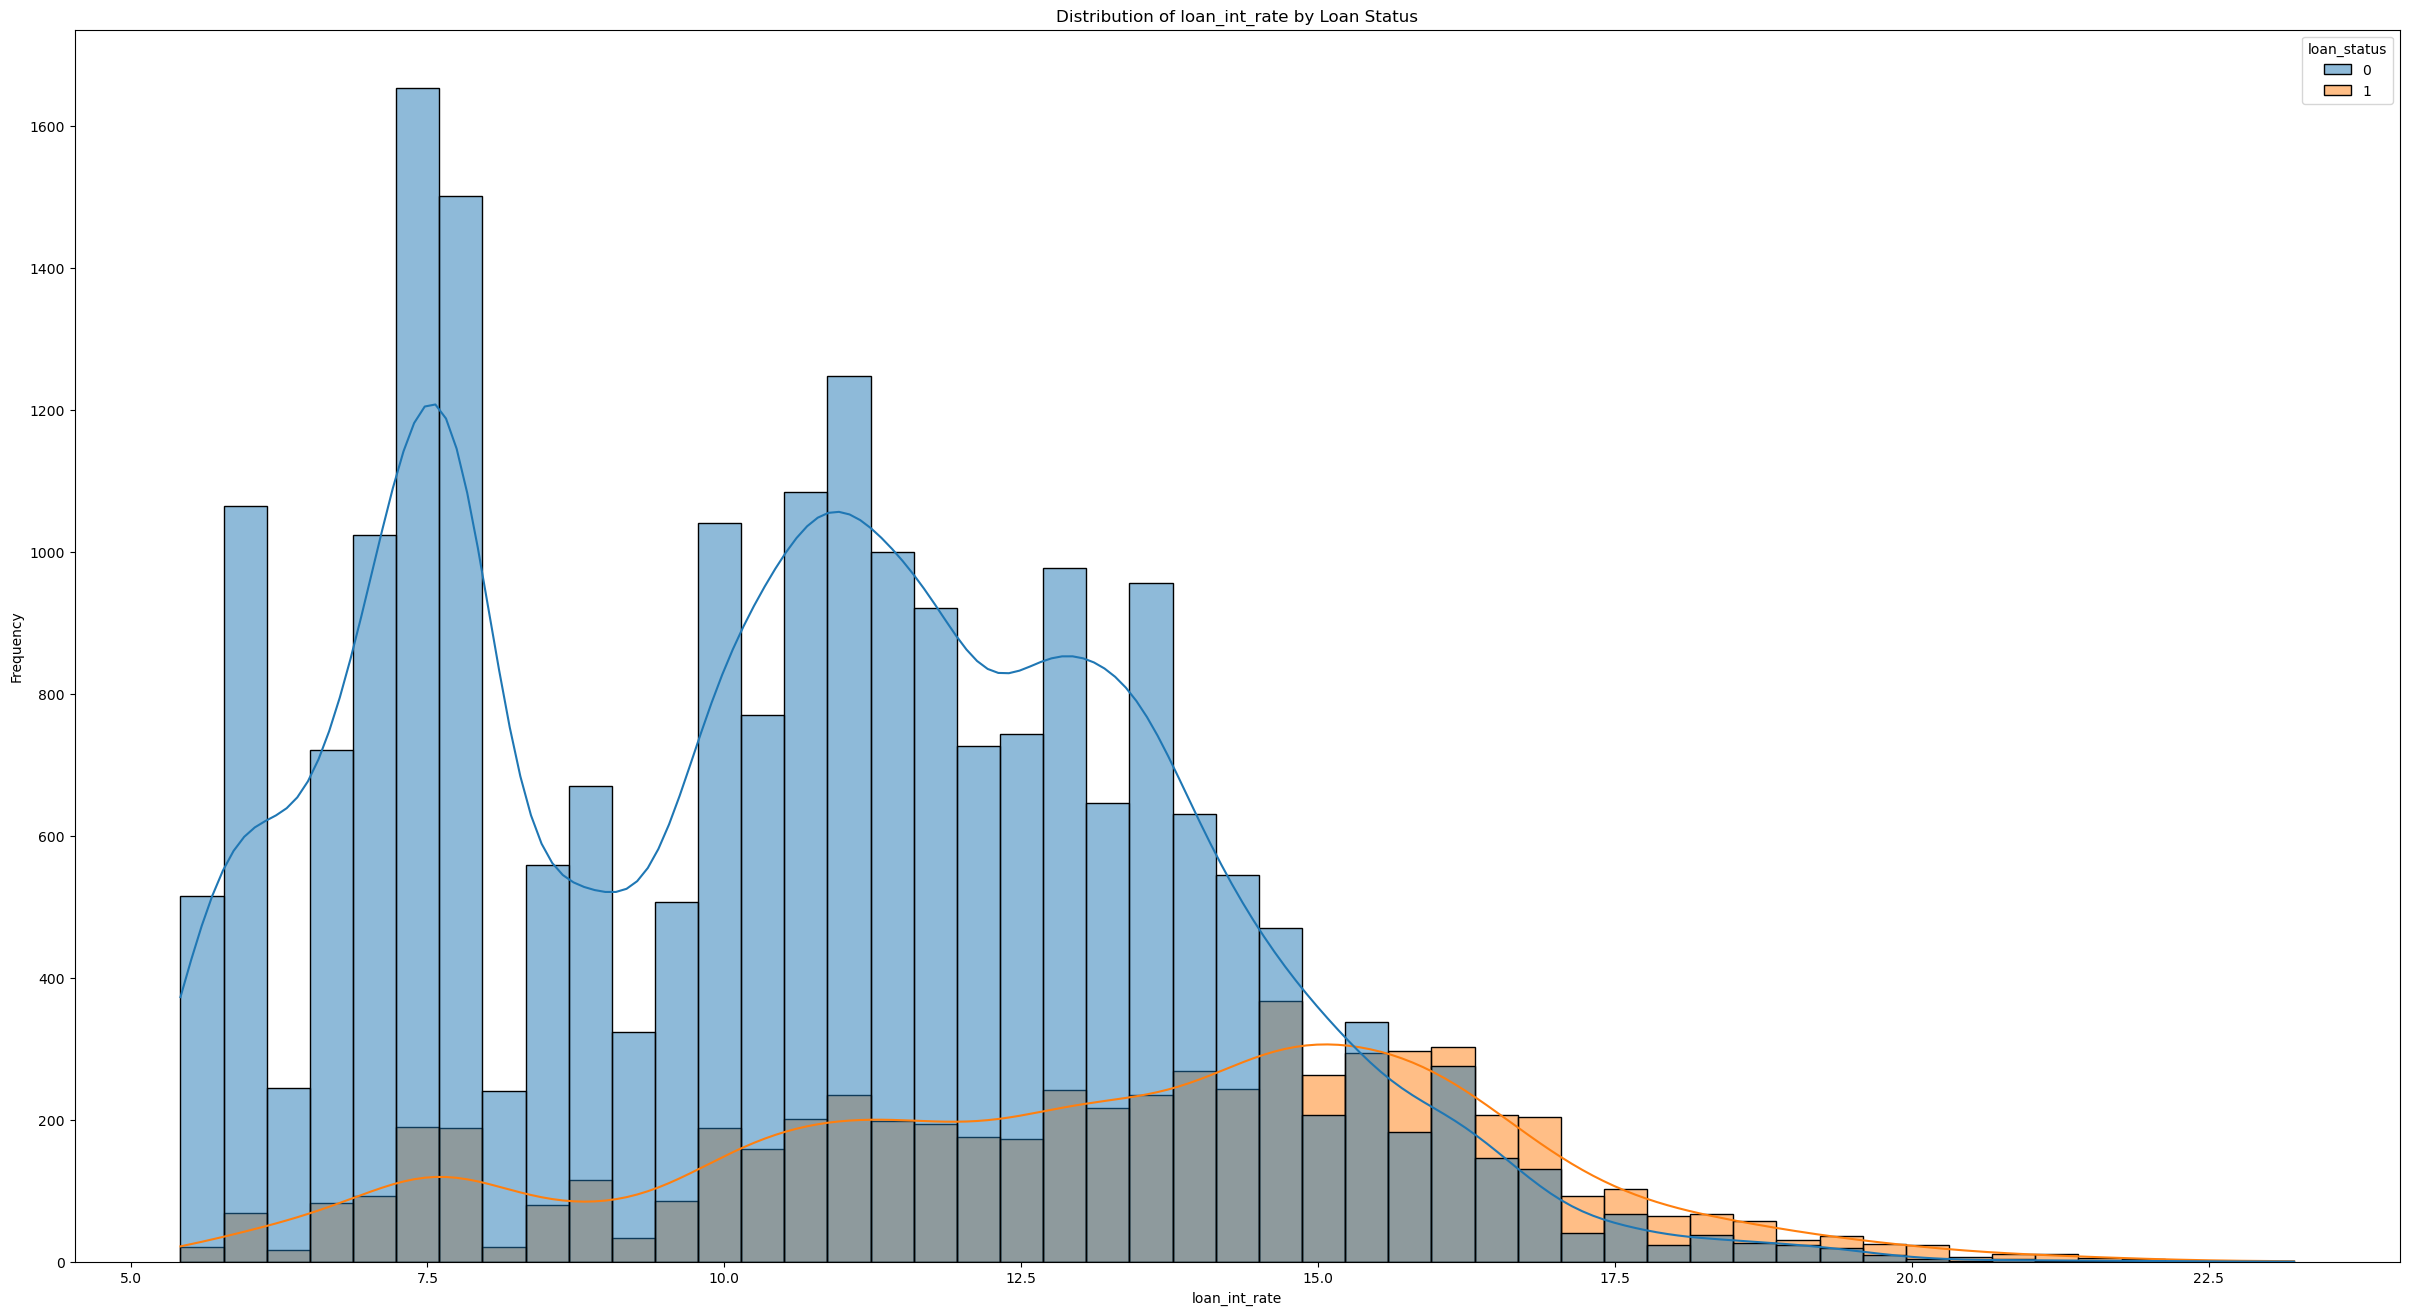

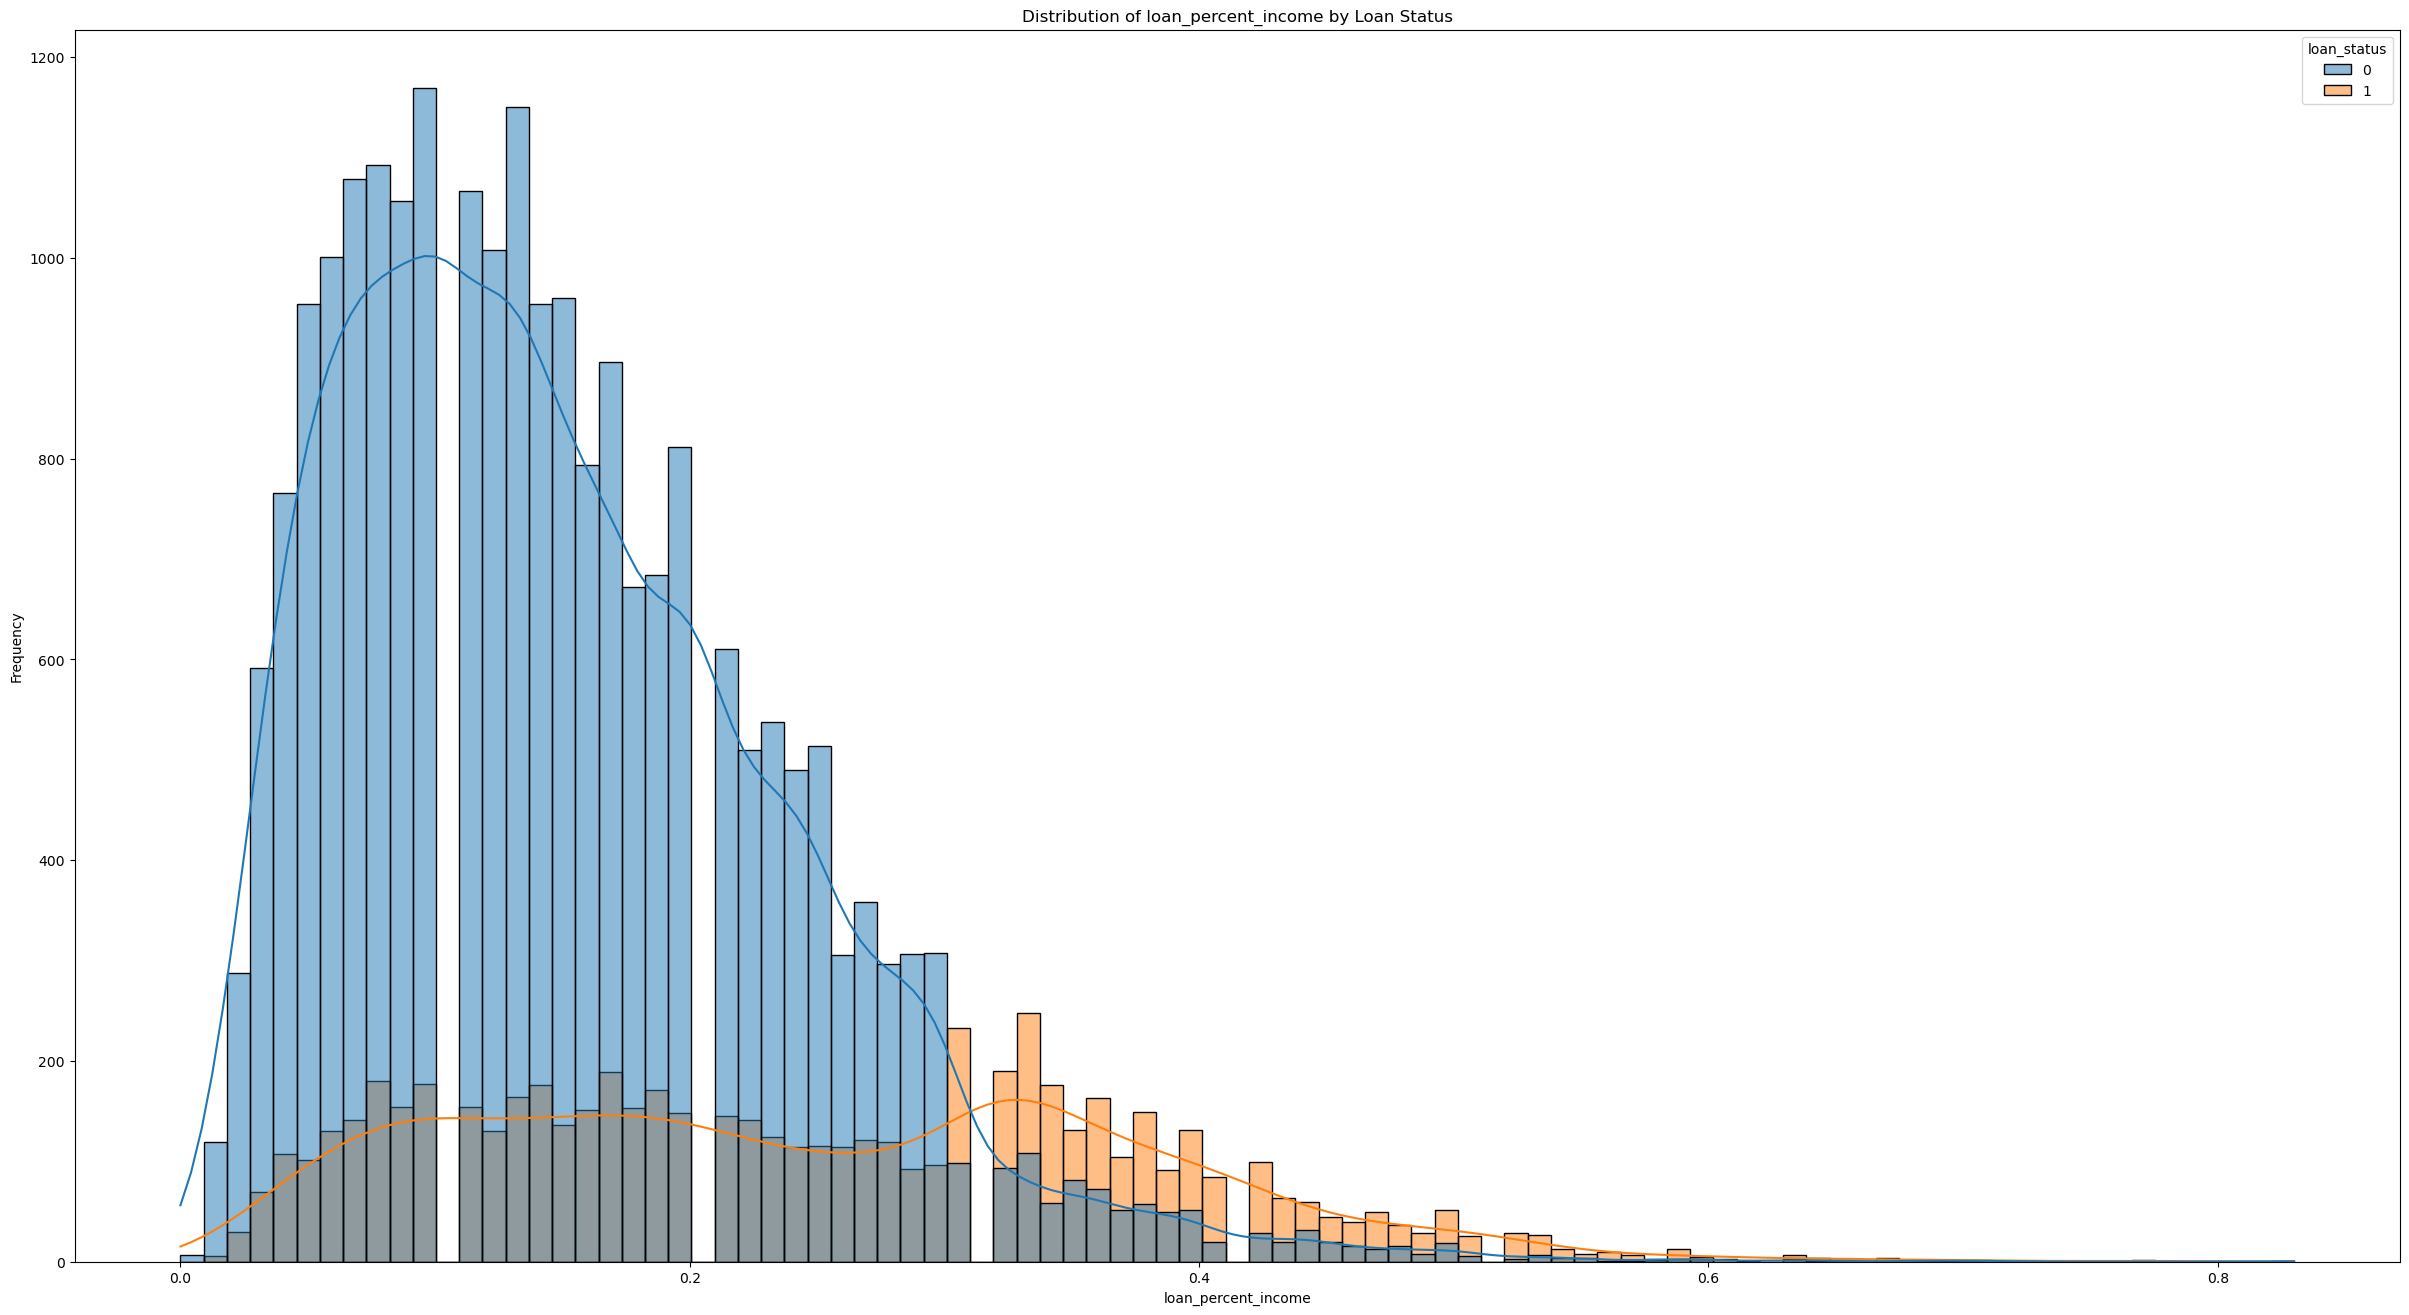

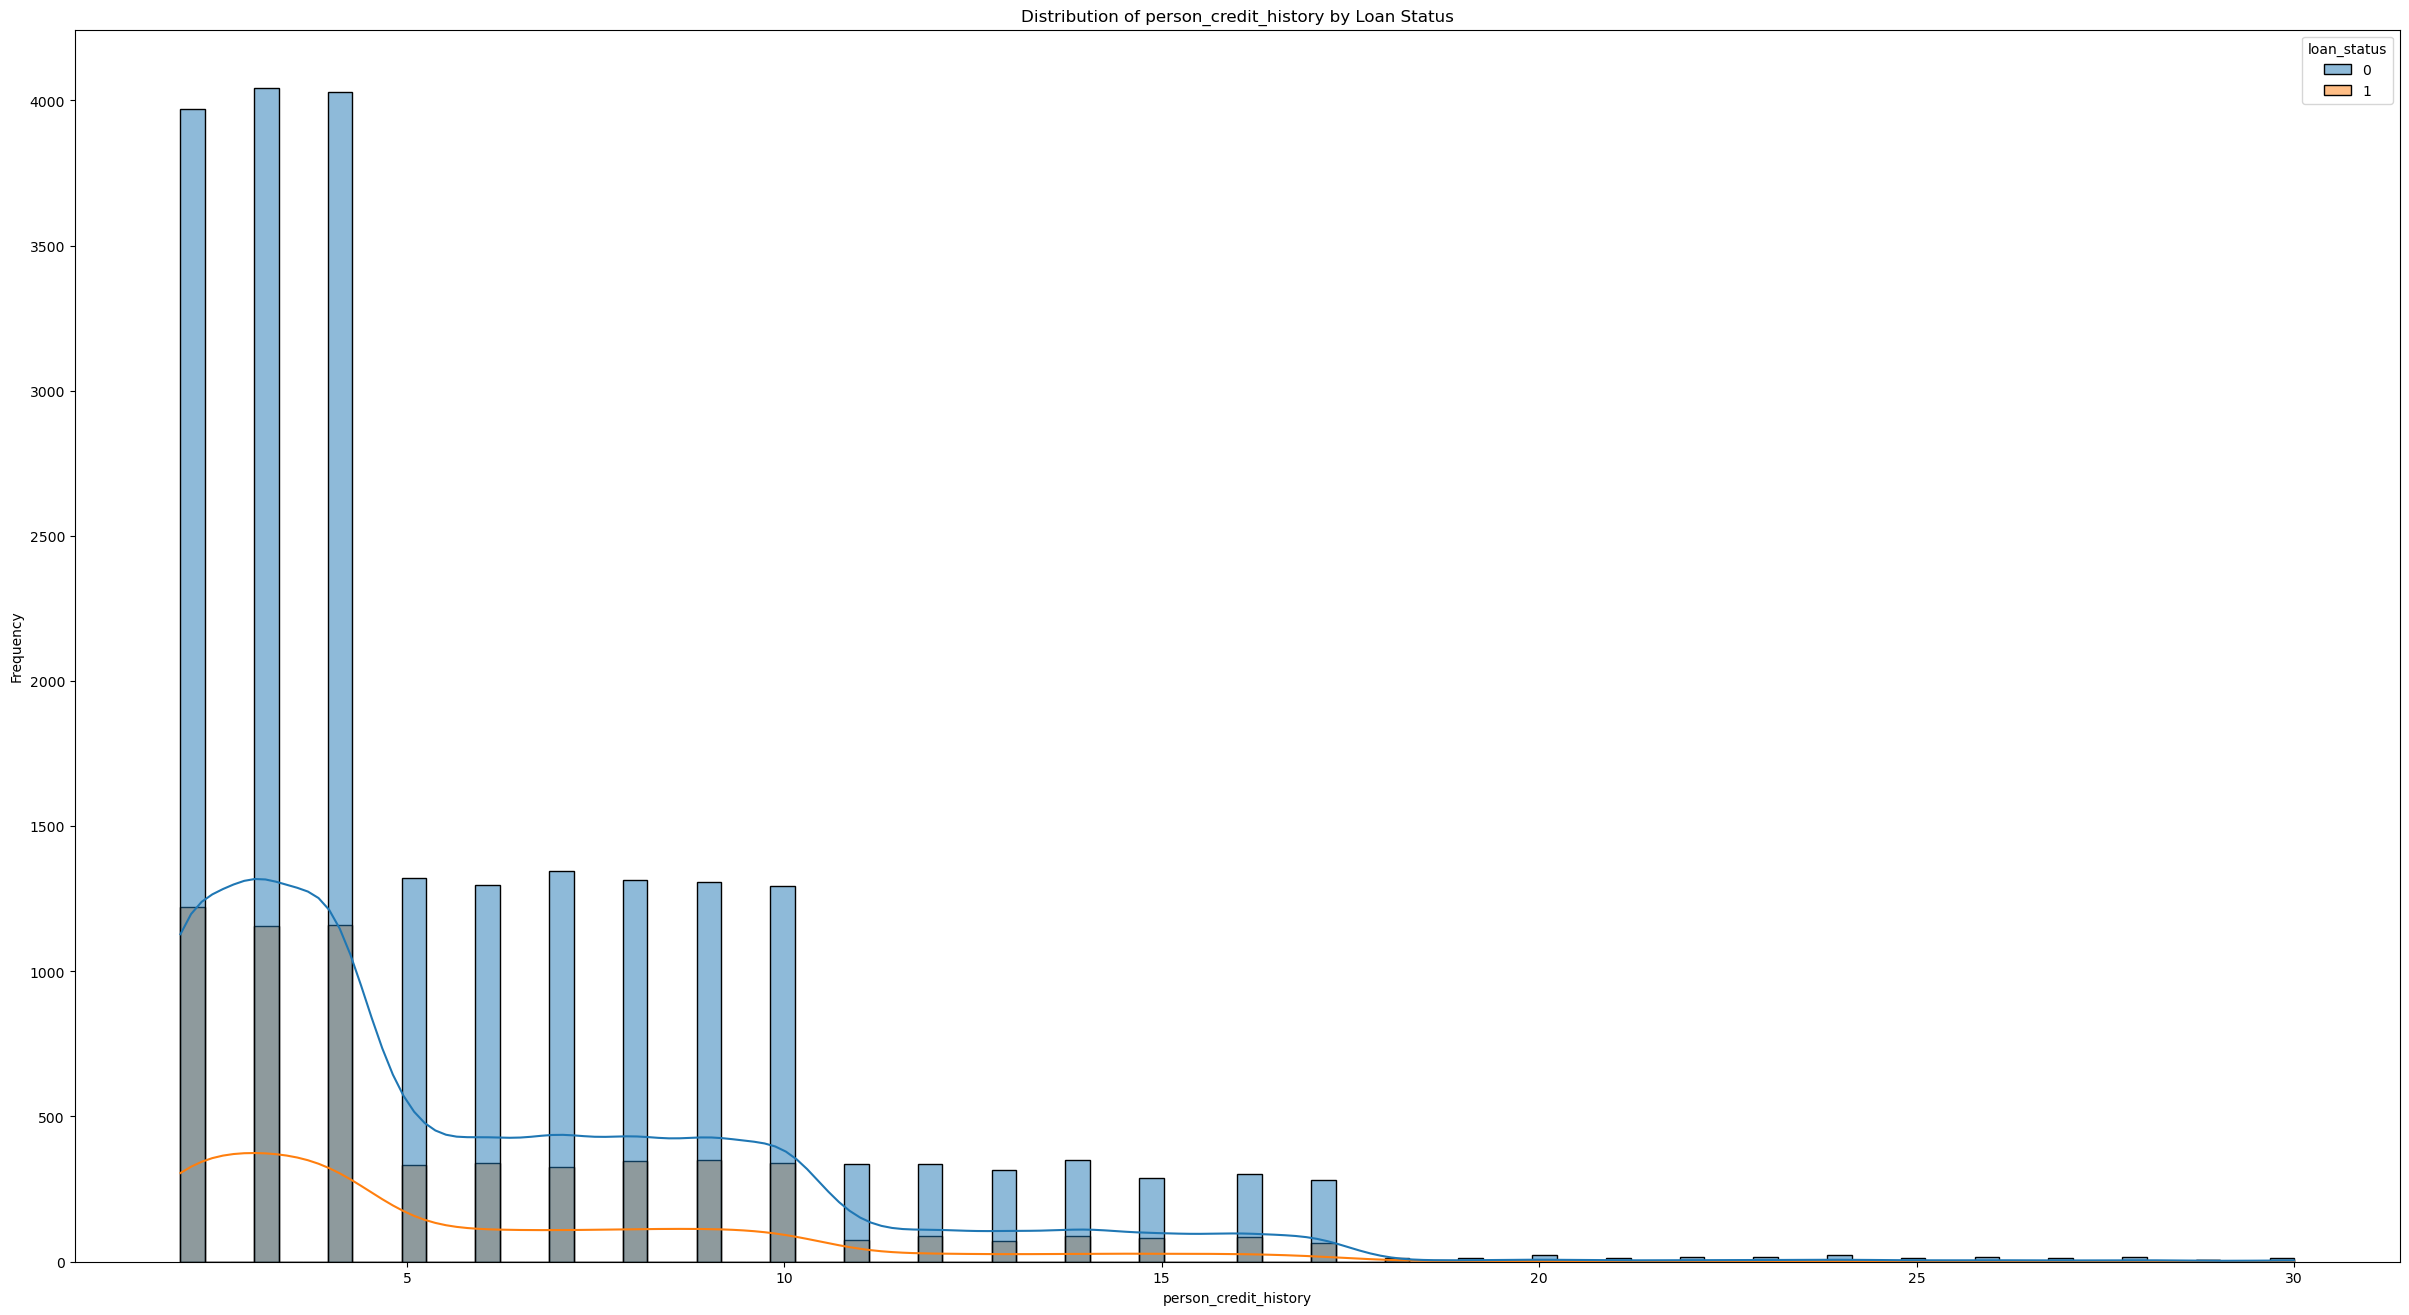

In [5]:
for feature in numeric_features:
    plt.figure(figsize=(30, 16))
    sns.histplot(data=df, x=feature, hue='loan_status', kde=True)
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

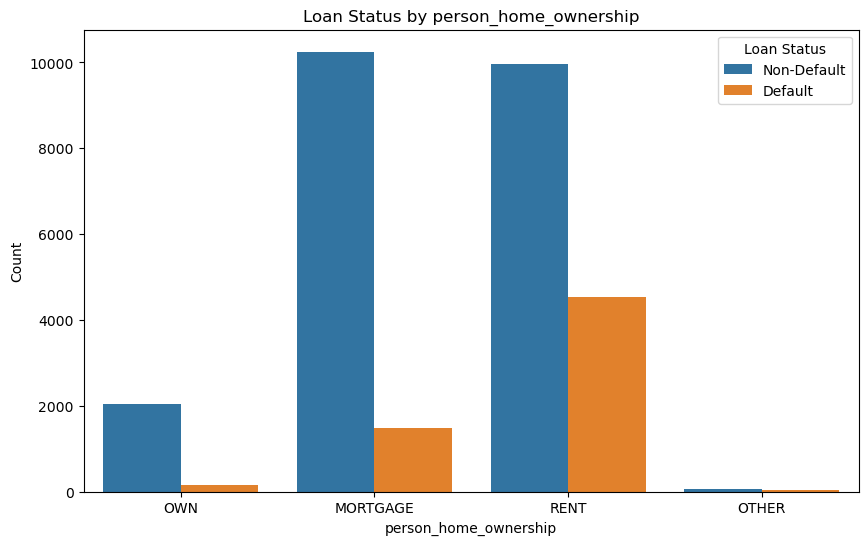

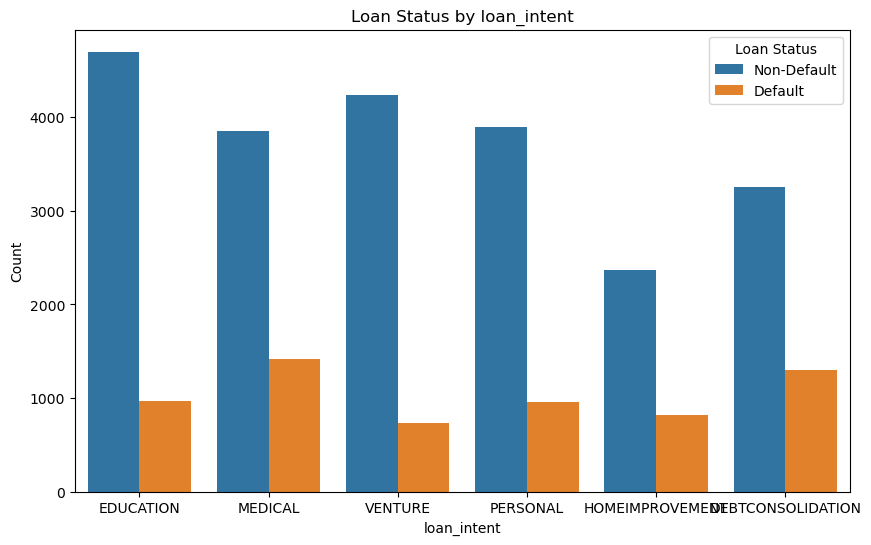

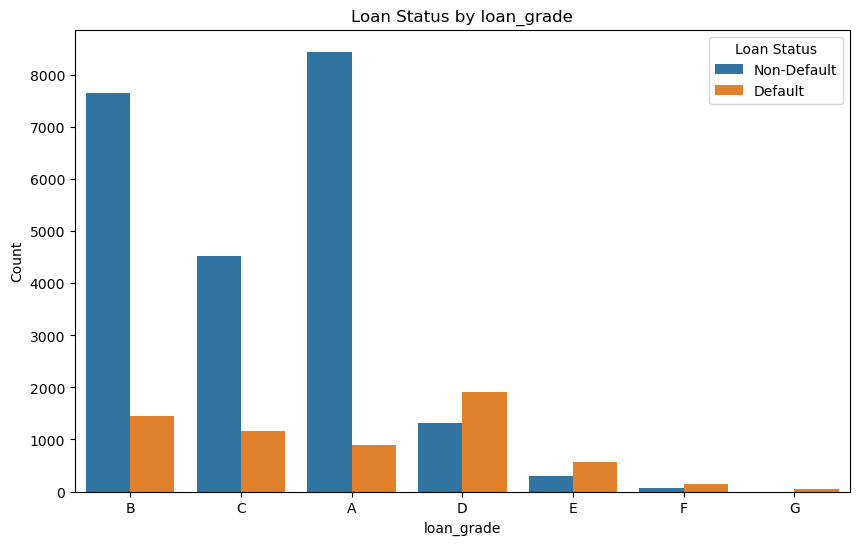

In [6]:


for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'Loan Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', labels=['Non-Default', 'Default'])
    plt.show()

In [7]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'])
X = df_encoded.drop('loan_status', axis=1) 
y = df_encoded['loan_status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced',random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      4461
           1       0.42      0.77      0.55      1238

    accuracy                           0.72      5699
   macro avg       0.67      0.74      0.67      5699
weighted avg       0.81      0.72      0.74      5699



In [8]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train) 
model_sm = sm.Logit(y_train, X_train_sm)
result = model_sm.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.336372
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                22796
Model:                          Logit   Df Residuals:                    22772
Method:                           MLE   Df Model:                           23
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                  0.3571
Time:                        16:57:25   Log-Likelihood:                -7667.9
converged:                       True   LL-Null:                       -11927.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8072   1.13e+06   -1.6e-06     

In [30]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced',random_state=42, max_iter=1000)
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Individual Scores:', scores)

print('Accuracy Mean (std): %.3f (%.3f)' % (mean(scores), std(scores)))

Individual Scores: [0.69134936 0.7243376  0.69327952 0.69784173 0.7088963 ]
Accuracy Mean (std): 0.703 (0.012)


> folds=5, accuracy=0.703 (0.691,0.724)
> folds=6, accuracy=0.705 (0.639,0.759)
> folds=7, accuracy=0.698 (0.639,0.755)
> folds=8, accuracy=0.701 (0.634,0.762)
> folds=9, accuracy=0.696 (0.639,0.717)
> folds=10, accuracy=0.702 (0.632,0.745)
> folds=11, accuracy=0.697 (0.629,0.775)
> folds=12, accuracy=0.710 (0.688,0.746)
> folds=13, accuracy=0.699 (0.626,0.774)
> folds=14, accuracy=0.712 (0.691,0.769)
> folds=15, accuracy=0.710 (0.619,0.760)
> folds=16, accuracy=0.703 (0.633,0.761)
> folds=17, accuracy=0.704 (0.686,0.753)
> folds=18, accuracy=0.699 (0.623,0.764)
> folds=19, accuracy=0.707 (0.681,0.754)
> folds=20, accuracy=0.698 (0.633,0.733)
> folds=21, accuracy=0.703 (0.679,0.770)
> folds=22, accuracy=0.715 (0.680,0.763)
> folds=23, accuracy=0.702 (0.673,0.760)
> folds=24, accuracy=0.704 (0.676,0.776)
> folds=25, accuracy=0.709 (0.667,0.761)


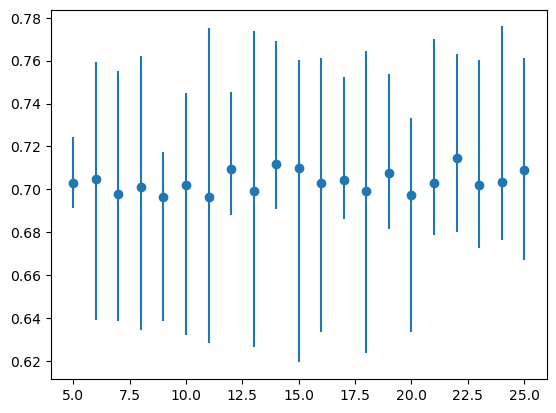

In [39]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# evaluate the model using a given test condition
def evaluate_model(cv):
 model = LogisticRegression(class_weight='balanced',random_state=42, max_iter=1000)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

 return mean(scores), scores.min(), scores.max()

# calculate the ideal test condition
#ideal, _, _ = evaluate_model(LeaveOneOut())
#print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(5,26)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
 # define the test condition
 cv = KFold(n_splits=k, shuffle=True, random_state=1)
 # evaluate k value
 k_mean, k_min, k_max = evaluate_model(cv)
 # report performance
 print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
 # store mean accuracy
 means.append(k_mean)
 # store min and max relative to the mean
 mins.append(k_mean - k_min)
 maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
#pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

In [43]:
overall_mean = mean(means)
print('Overall Mean Accuracy: %.3f' % overall_mean)


Overall Mean Accuracy: 0.704


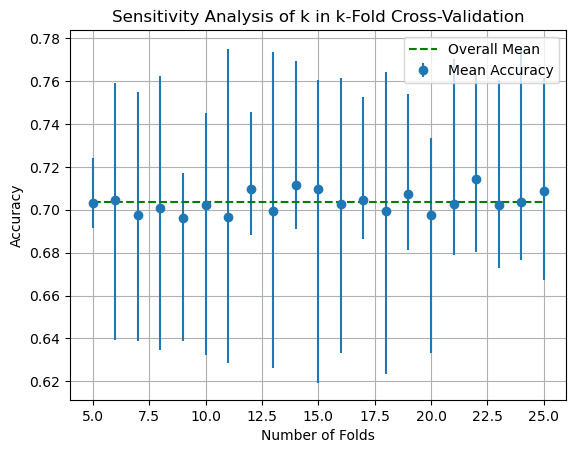

In [44]:
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o', label='Mean Accuracy')
# plot the ideal case in a separate color
#pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r', label='Ideal')
# plot the overall mean
pyplot.plot(folds, [overall_mean for _ in range(len(folds))], color='g', linestyle='--', label='Overall Mean')
# add labels and legend
pyplot.xlabel('Number of Folds')
pyplot.ylabel('Accuracy')
pyplot.title('Sensitivity Analysis of k in k-Fold Cross-Validation')
pyplot.legend()
# show the plot
pyplot.grid(True)
pyplot.show()